# Linear Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Attribute Information

1. **CRIM** — per capita crime rate by town  
2. **ZN** — proportion of residential land zoned for lots over 25,000 sq.ft.  
3. **INDUS** — proportion of non-retail business acres per town  
4. **CHAS** — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
5. **NOX** — nitric oxides concentration (parts per 10 million)  
6. **RM** — average number of rooms per dwelling  
7. **AGE** — proportion of owner-occupied units built prior to 1940  
8. **DIS** — weighted distances to five Boston employment centres  
9. **RAD** — index of accessibility to radial highways  
10. **TAX** — full-value property-tax rate per $10,000  
11. **PTRATIO** — pupil-teacher ratio by town  
12. **B** — 1000(Bk - 0.63)² where Bk is the proportion of Black residents by town  
13. **LSTAT** — % lower status of the population  
14. **MEDV** — median value of owner-occupied homes in $1000s  


In [10]:
# Different columns provide various information about housing/location
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

df = pd.read_csv(url, header=None, names=col_names, sep='\s+')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
x = df["RM"].values
y = df["PRICE"].values
print(f"x shape: {x.shape} | y shape: {y.shape}")

x shape: (506,) | y shape: (506,)


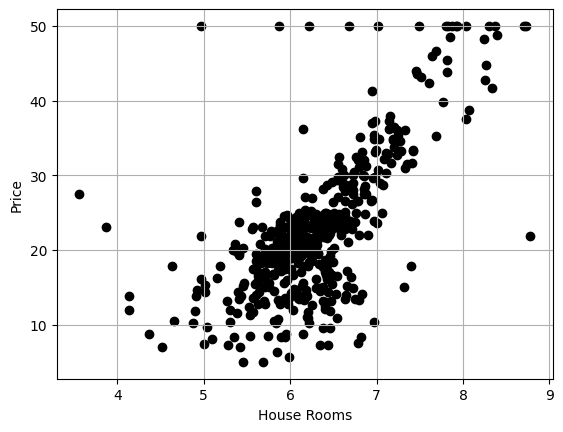

In [12]:
plt.scatter(x, y, color="black")
plt.xlabel("House Rooms")
plt.ylabel("Price")

plt.grid()
plt.show()


#### Plotting

9.10210898118031 -34.67062077643858


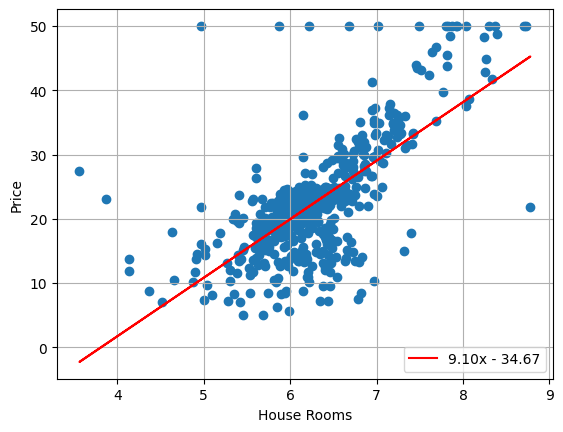

In [13]:
# Line of best fit
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
y_intercept = coefficients[1]

line = slope * x + y_intercept

print(slope, y_intercept)

plt.xlabel("House Rooms")
plt.ylabel("Price")
plt.plot(x, line, color="red", label="9.10x - 34.67")
plt.scatter(x, y)

plt.legend()
plt.grid()
plt.show()

### Mean Squared Error

In [14]:
# Mean Squared Error

y_hat = slope * x + y_intercept
error = (y - y_hat) ** 2
mse = sum(error)/len(error)
print(mse)

y_hat1 = 13 * x - 40
error1 = (y - y_hat1) ** 2
mse1 = sum(error1)/len(error1)
print(mse1)

43.60055177116954
418.4771267648223


# Least Squares Regression
weights = np.linalg.inv(X.T @ X) @ X.T @ Y 

Then getting y_hat by feeding x values through weights

## Calculating MSE

Use y_hat and y, and perform operations on each term of the array.

In [42]:
import numpy as np

# Getting input and expected output vals
x = df["RM"].values
y = df["PRICE"].values

# Number of rows in input
N = len(x)

# Making X an N x 2 matrix with the first column full of ones, second with values from x.
X = np.ones((N, 2))
X[:, 1] = x

# Reshape y to be a N x 1 matrix
Y = np.array(y).reshape(N, 1)

# Formula to get weights
W = np.linalg.inv(X.T @ X) @ X.T @ Y

# Calculate MSE
y_hat = X @ W

error = (Y - y_hat) ** 2
mse = np.mean(error)

print(mse)

43.60055177116956


# Multivariable Linear Regression

21.894831181729202


/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:12: RuntimeWarning: divide by zero encountered in matmul
  W = np.linalg.inv(X.T @ X) @ X.T @ Y
/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:12: RuntimeWarning: overflow encountered in matmul
  W = np.linalg.inv(X.T @ X) @ X.T @ Y
/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:12: RuntimeWarning: invalid value encountered in matmul
  W = np.linalg.inv(X.T @ X) @ X.T @ Y
/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:14: RuntimeWarning: divide by zero encountered in matmul
  y_hat = X @ W
/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:14: RuntimeWarning: overflow encountered in matmul
  y_hat = X @ W
/var/folders/ny/6mh5d0q569180s3ym7_0gtk00000gn/T/ipykernel_41946/2371449679.py:14: RuntimeWarning: invalid value encountered in matmul
  y_hat = X @ W


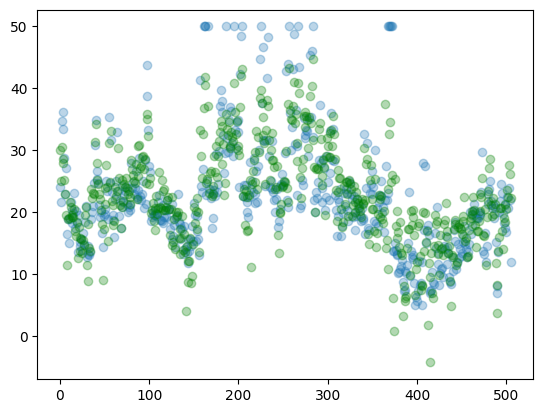

In [43]:
x_col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
y_col_names = ['PRICE']

x = df[x_col_names].values
y = df["PRICE"].values

ones_col = np.ones((x.shape[0], 1))

X = np.hstack([ones_col, x])
Y = y.reshape(-1, 1)

W = np.linalg.inv(X.T @ X) @ X.T @ Y

y_hat = X @ W

error = (Y - y_hat) ** 2
mse = np.mean(error)

print(mse)

# Graph
plt.scatter(range(506), y, alpha=0.3)
plt.scatter(range(506), y_hat, color="green", alpha=0.3)
plt.show()